In [27]:
import folium
from folium import Choropleth, Circle, Marker, Icon, Map
from folium.plugins import HeatMap, MarkerCluster
import pandas as pd
import requests
import src.visualization as sr
import geopy
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dfbarna= pd.read_csv('/Users/luissanchezdeleon/ironhack/Proyecto3-/Input/dfbarna.csv')
dfmunich= pd.read_csv('/Users/luissanchezdeleon/ironhack/Proyecto3-/Input/dfmunich.csv')
dfparis= pd.read_csv('/Users/luissanchezdeleon/ironhack/Proyecto3-/Input/dfparis.csv')

# Maps

## Barcelona map

We apply the map function to create a map with the locations of the points obtained for each city by using the previously imported folium library. 

In [3]:
sr.geocode("barcelona")

{'type': 'Point', 'coordinates': [2.15379, 41.40359]}

In [4]:
barna={'type': 'Point', 'coordinates': [2.15379, 41.40359]}

In [5]:
dfbarna.rename(columns={"latitud": "lat", "longitud":"long"}, inplace=True)

In [6]:
barna_map=sr.map_it(dfbarna,barna.get('coordinates')[1],barna.get('coordinates')[0])

## Munich map

In [7]:
sr.geocode("munich")
munich={'type': 'Point', 'coordinates': [2.15379, 41.40359]}

In [8]:
dfmunich.rename(columns={"latitud": "lat", "longitud":"long"}, inplace=True)
munich_map=sr.map_it(dfmunich,munich.get('coordinates')[1],munich.get('coordinates')[0])

## Paris map

In [9]:
sr.geocode("paris")
paris={'type': 'Point', 'coordinates': [2.15379, 41.40359]}

In [10]:
dfparis.rename(columns={"latitud": "lat", "longitud":"long"}, inplace=True)
paris_map=sr.map_it(dfparis,paris.get('coordinates')[1],paris.get('coordinates')[0])

# Getting Zip Codes

To obtain the zip codes of each city we make use of the geopy library and make a request to the API to obtain the zip codes that we then add to our previous Dataframes.

## Barcelona

In [11]:
geolocator = geopy.Nominatim(user_agent='myGeocoder')

In [14]:
zipcodes = dfbarna.apply(sr.get_zipcode, axis=1, geolocator=geolocator, lat='lat', long='long')

In [16]:
dfbarna['Zipcodes'] =zipcodes

In [23]:
dfbarna.head()

,name,lat,long,category,Zipcodes
0,Starbucks Rambla Cataluña,41.387954,2.167901,Starbucks,08007
1,Starbucks Plaza Universitat,41.385419,2.163150,Starbucks,08001
2,Starbucks,41.387848,2.169634,Starbucks,08007
3,Starbucks Room Mate Anna,41.392782,2.165632,Starbucks,08001
4,Starbucks Pelai,41.385805,2.167858,Starbucks,08001


We simply represent those zip codes with the most favorable results using the seaborn library. A numerical way to obtain the number of values for each neighborhood would be by using value_counts.

Text(0.5, 1.0, 'Query results in Barcelona/zipcode')

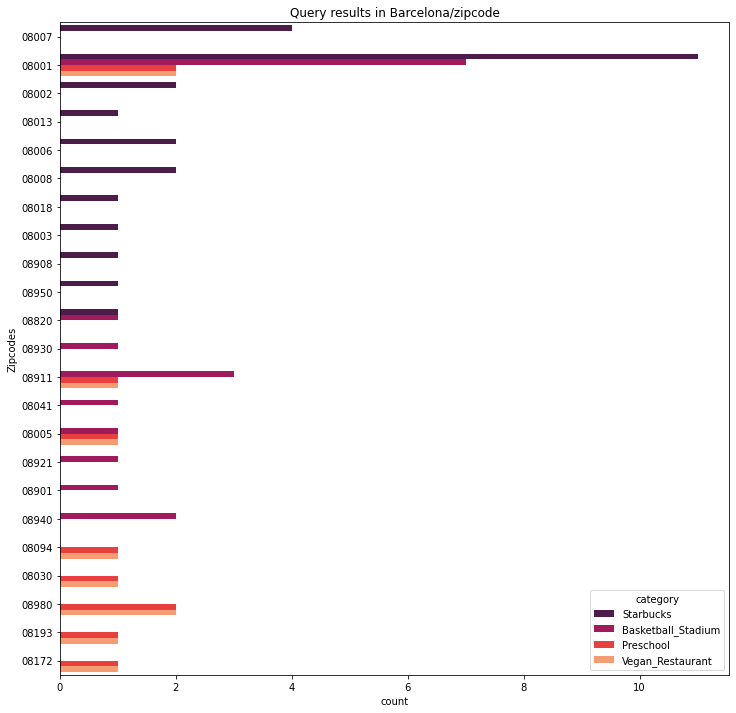

In [28]:
fig, ax = plt.subplots(figsize = (12,12))
sns.countplot(y=dfbarna.Zipcodes, hue=dfbarna.category, saturation=10, palette="rocket")
ax.set_title("Query results in Barcelona/zipcode")

## Paris 

In [34]:
zipcodes_p = dfparis.apply(sr.get_zipcode, axis=1, geolocator=geolocator, lat='lat', long='long')
dfparis['Zipcodes'] =zipcodes_p

Text(0.5, 1.0, 'Query results in Paris/zipcode')

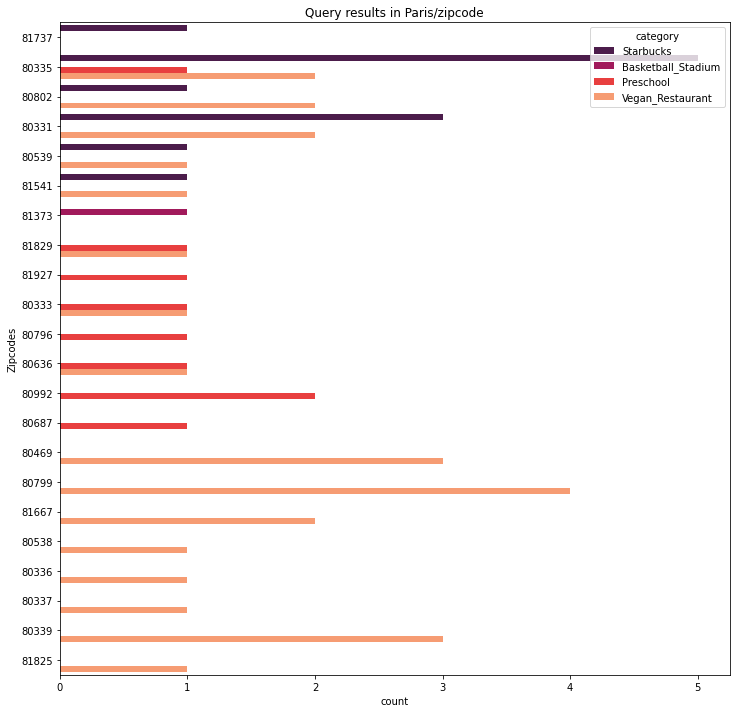

In [35]:
fig, ax = plt.subplots(figsize = (12,12))
sns.countplot(y=dfparis.Zipcodes, hue=dfparis.category, saturation=10, palette="rocket")
ax.set_title("Query results in Paris/zipcode")

## Munich

In [25]:
zipcodes_m = dfmunich.apply(sr.get_zipcode, axis=1, geolocator=geolocator, lat='lat', long='long')
dfmunich['Zipcodes'] =zipcodes_m

Text(0.5, 1.0, 'Query results in Munich/zipcode')

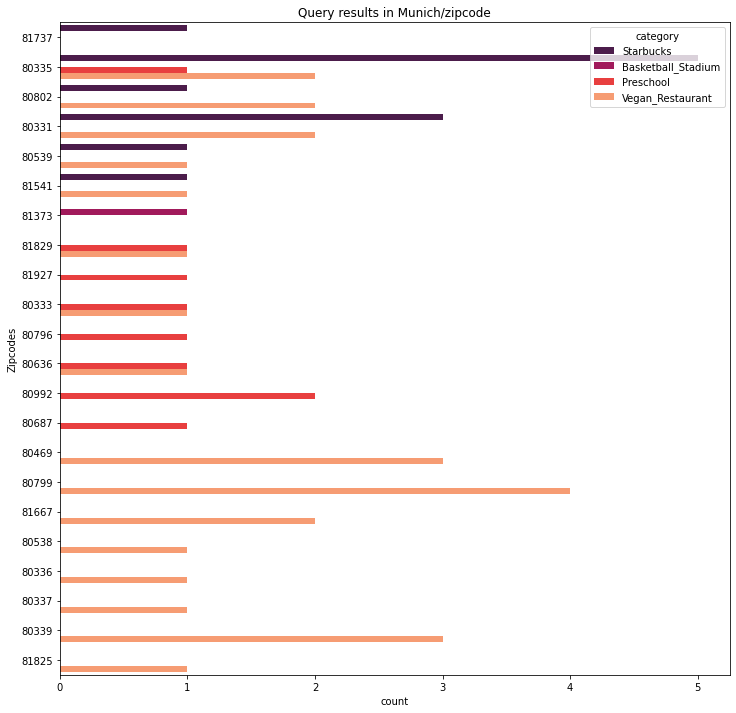

In [33]:
fig, ax = plt.subplots(figsize = (12,12))
sns.countplot(y=dfmunich.Zipcodes, hue=dfmunich.category, saturation=10, palette="rocket")
ax.set_title("Query results in Munich/zipcode")